Task 1: Exploratory Data Analysis on a Public Dataset

Description: Analyze a real-world dataset (such as Titanic, Iris, or any Kaggle dataset). 
Generate insights through visualizations and summary statistics

Challenges:

Handle missing and duplicate data.

Visualize key relationships using Matplotlib/Seaborn.

Write a short report summarizing findings.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [11]:
# Loading dataset
df = sb.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


(891, 15)

In [5]:
# Handling missing values
print(df.isnull().sum())
df['age'] = df['age'].fillna(df['age'].median())
df.drop(columns=['deck', 'embark_town'], inplace=True)
df

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


In [6]:
# Handling duplicate values
print(df.duplicated().sum())
df = df.drop_duplicates()
df

116


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


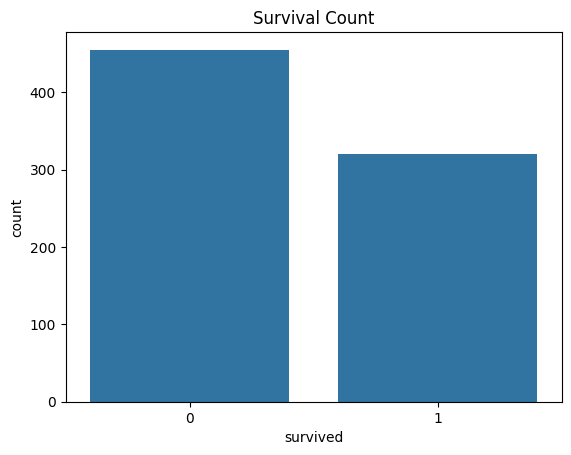

In [7]:
# Visualizations
# Survival count
sb.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()

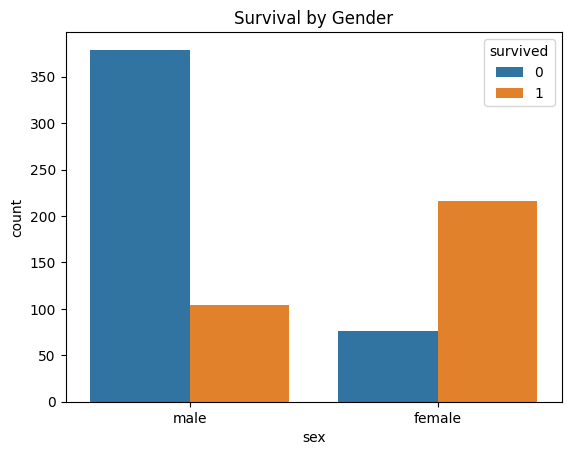

In [8]:
# Survival by gender
sb.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

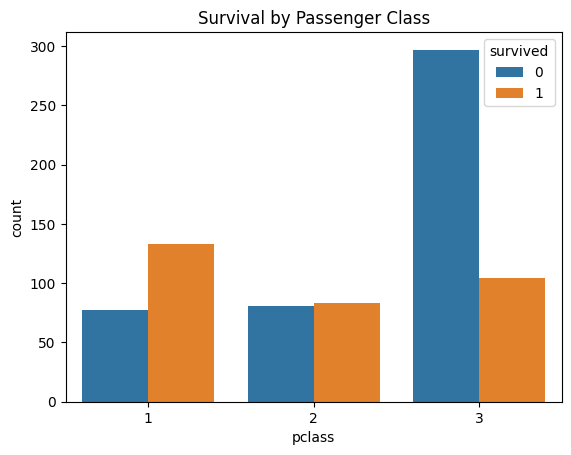

In [9]:
# Survival by passaenger class
sb.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

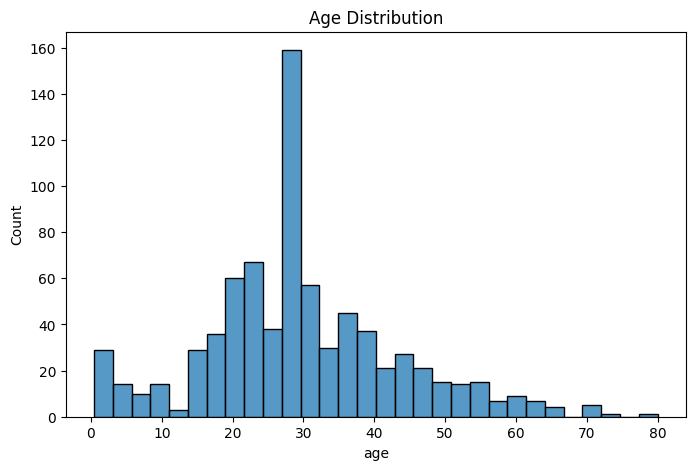

In [10]:
# Age distribution
plt.figure(figsize=(8,5))
sb.histplot(df['age'], bins=30)
plt.title("Age Distribution")
plt.show()